In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


**Housing Rent Dataset**

I will be analyzing housing rent dataset, taken from Kaggle: [You can download the dataset here](http://https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)


This dataset is based on India's rental market in 2022.

This notebook is not finished, and will be updated in the future, but what is here should be helpful for someone who is looking for example of EDA/Feature engineering.

In [2]:
df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

In [3]:
print(df['Posted On'].sort_values())

1222    2022-04-13
244     2022-04-23
418     2022-04-23
303     2022-04-23
413     2022-04-23
           ...    
4368    2022-07-10
4126    2022-07-10
4546    2022-07-10
3743    2022-07-10
3552    2022-07-11
Name: Posted On, Length: 4746, dtype: object


In [4]:
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

**Dataset Description And Features Summary**

Following are the features and data types of our dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Our dataset has a singular date column: 
* Posted On: The date on which posting was created 

4 continious variables:
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats. 
* Size: Size of the Houses/Apartments/Flats in Square Feet. 
* Bathroom: Number of Bathrooms.


And 7 categorical variables: 
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) 
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. 
* Area Locality: Locality of the Houses/Apartments/Flats. 
* City: City where the Houses/Apartments/Flats are Located. 
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. 
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent. 
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats. 

**Plan For Data Exploration**

Initial plan for data exploration will consist of: 
* Checking for missing values
* Checking for duplicates
* Examining statistical properties of our target variable, rent
* Examining types of categorical features
* Examening correlations of features and rent


*Checking for missing/NA values:*

Existing null values:

In [6]:
print('Number of missing values: ')
df.isnull().sum()

Number of missing values: 


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Existing NA values:

In [7]:
print('Number of NA values: ')
print(df.isna().sum())

Number of NA values: 
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


Our dataset is complete, and does not have any missing or NA values.

*Checking for duplicate values:*

In [8]:
print('Following data entries are duplicates:')
duplicate = df[df.index.duplicated()]
duplicate

Following data entries are duplicates:


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


Our dataset has no duplicates

**Examining statistical properties of target variable, rent:**

Preliminary statistical examination:

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Removing scientific notation

In [10]:
print('Rent Variable Statistical Description')
rent_description=df['Rent'].describe()
print(rent_description)

Rent Variable Statistical Description
count      4746.00
mean      34993.45
std       78106.41
min        1200.00
25%       10000.00
50%       16000.00
75%       33000.00
max     3500000.00
Name: Rent, dtype: float64


Based on the values of min and max, we potentially have outliers that need to be examined. No other anomalies can be detected from this information.

We will use a boxplot to further examine the interquartile range and potential outliers:

[Text(0.5, 1.0, 'Rent Boxplot Information')]

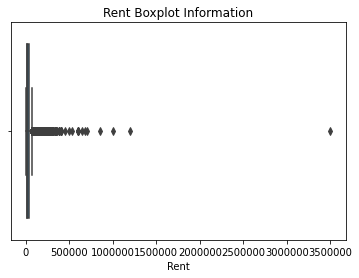

In [11]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(df['Rent']).set(title='Rent Boxplot Information')

It looks like we have several outliers, let's examine them to determine if we should keep or remove these outliers:

In [12]:
rent_outliers = df.sort_values('Rent',ascending=False)
print("Potential Outliers:")
print(rent_outliers[:10])

Potential Outliers:
       Posted On  BHK     Rent  Size         Floor    Area Type  \
1837  2022-06-08    3  3500000  2500    4 out of 4  Carpet Area   
1001  2022-06-01    4  1200000  5000   4 out of 15  Carpet Area   
827   2022-05-18    4  1000000  3064  18 out of 45  Carpet Area   
1329  2022-06-23    4   850000  3200    2 out of 4  Carpet Area   
1459  2022-06-27    4   700000  3200  24 out of 24  Carpet Area   
1484  2022-07-07    4   680000  1962  18 out of 20  Carpet Area   
1319  2022-05-31    5   650000  3000   8 out of 10  Carpet Area   
726   2022-06-20    4   600000  2500  12 out of 13  Carpet Area   
1384  2022-05-27    5   600000  4500   7 out of 20  Carpet Area   
792   2022-06-13    5   600000  3200  10 out of 16  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
1837              Marathahalli  Bangalore    Semi-Furnished         Bachelors   
1001                      Juhu     Mumbai    Semi-Furnished  Bachelors/Family   

It looks like the first 4 points have abnormally high rent, that is not explained by other variables in our dataset. Potentially they could be explained by other variables, such as building quality or construction date, but we lack such information in our dataset. We will remove those outliers, and look at boxplot again:

In [13]:
df = df[df['Rent']<850000] #Dropping all data points where rent is equal or greater to 850000

[Text(0.5, 1.0, 'Rent Boxplot Information')]

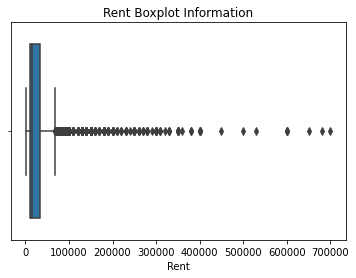

In [14]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(df['Rent']).set(title='Rent Boxplot Information')

We still quite a few datapoints outside of our maximum range, let's examine them to make sure we are not missing anything:

In [15]:
rent_description=df['Rent'].describe() #Recalculating statistics with outliers removed
maximum_whisker= rent_description['75%'] + 1.5*(rent_description['75%']-rent_description['25%'])
print('Amount of points above maximum:',len(df[df['Rent']>maximum_whisker]))
print('')
print(df[df['Rent']>maximum_whisker].sort_values(by='Rent',ascending=False)[:10])

Amount of points above maximum: 516

       Posted On  BHK    Rent  Size         Floor    Area Type  \
1459  2022-06-27    4  700000  3200  24 out of 24  Carpet Area   
1484  2022-07-07    4  680000  1962  18 out of 20  Carpet Area   
1319  2022-05-31    5  650000  3000   8 out of 10  Carpet Area   
1384  2022-05-27    5  600000  4500   7 out of 20  Carpet Area   
792   2022-06-13    5  600000  3200  10 out of 16  Carpet Area   
726   2022-06-20    4  600000  2500  12 out of 13  Carpet Area   
3656  2022-07-06    2  600000   950    1 out of 1  Carpet Area   
2750  2022-06-11    4  530000  4000    3 out of 4  Carpet Area   
1023  2022-07-09    5  500000  3900    4 out of 6  Carpet Area   
839   2022-05-19    5  450000  3400    2 out of 5  Carpet Area   

                 Area Locality     City Furnishing Status  Tenant Preferred  \
1459   Lady Ratan Tower, Worli   Mumbai         Furnished  Bachelors/Family   
1484                 Khar West   Mumbai    Semi-Furnished  Bachelors/Family   

While these data points seem to lie well outside of our maximum range, there isn't any indication of those points being anomalous. Considering they make up a good chunk of our dataset, we will leave them in. Most likely they can be explained by some unknown variable that we don't have in our dataset.

**Let's examine the distribution of rent, using a histogram:**

Skewness of Rent Variable: 5.035145847960744


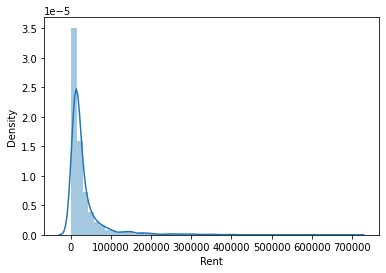

In [16]:
rent_distribution = sns.distplot(df['Rent'])
print(f"Skewness of Rent Variable: {df['Rent'].skew()}")

As expected from our boxplot examination, the data is highly skewed, with a skew value of 5. Let's try to apply a log transform and see if we can get a normal distribution:

Skewness of Rent Variable: 0.8592791570371967


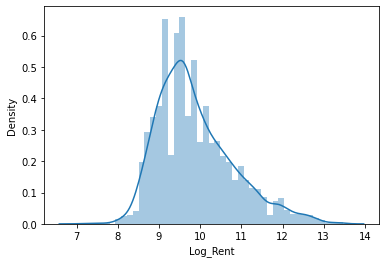

In [17]:
df['Log_Rent'] = np.log(df['Rent'])
rent_distribution_log = sns.distplot(df['Log_Rent'])
print(f"Skewness of Rent Variable: {df['Log_Rent'].skew()}")

After the log transform, our target variable still experiences moderate skew with value of 0.85, but it is now much closer to a normal distribution.

**Examining continuous features correlations to the target variable:**

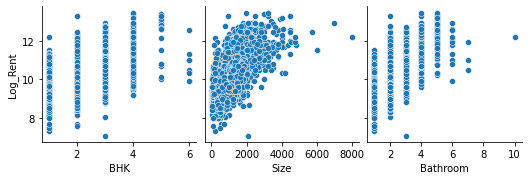

In [18]:
df_num = df.select_dtypes(include = ['int64','float64'])
sns.pairplot(data=df_num,
            x_vars=df_num[['BHK','Size','Bathroom']],
            y_vars=['Log_Rent'])

Visually, our correlations apear sensible. There are a few points that lie outside of normal ranges, but they don't appear to deviate in a problematic way from the rest. Prehaps if we collect more data, they would be more in tune with the rest of the values.

**Let's look at correlation heatmap to confirm that those numeric variables can be used for linear regression:**

In [46]:
df_num_corr = df_num[['BHK','Rent','Size','Bathroom']].corr()
df_num_corr.style.background_gradient(cmap ='coolwarm')

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.491727,0.715737,0.794140
Rent,0.491727,1.000000,0.513999,0.593913
Size,0.715737,0.513999,1.000000,0.740503
Bathroom,0.794140,0.593913,0.740503,1.000000


As we can see, all the numerical features have correlation of at least 0.5 to our log normalized rent. Interestingly, the correlation is stronger in log transformed target than they are in the original. This makes sense, as we are using Pearson linear correlations, which will be affected by large values in non-transformed target.

**Finally, let's examine the correlations of numerical features:**

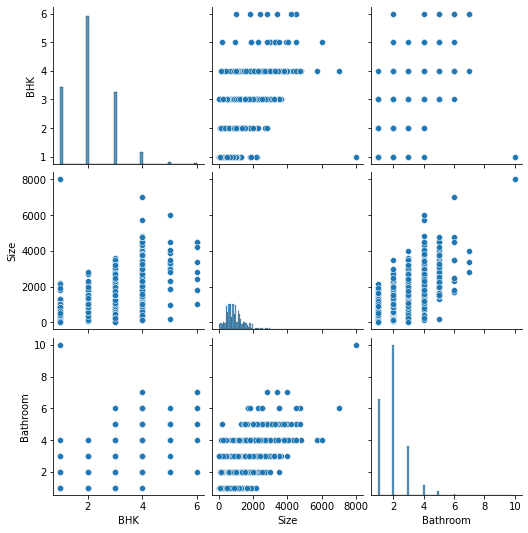

In [20]:
sns.pairplot(data=df_num,
            x_vars=df_num[['BHK','Size','Bathroom']],y_vars=df_num[['BHK','Size','Bathroom']])

We have a weird outlier that has 1 room and 10 bathrooms, while I'll ignore it for now, it's a good idea to examine that datapoint in the future. We don't observe any other anomalous correlations or problems, however, it seems like features size and bathroom seem to be skewed. Let's normalize them using log transform, and plot a correlation heatmap to see if correlations of those features become stronger to our target variable. 

In [21]:
df_num['Log_Bathroom'] = np.log(df_num['Bathroom'])
df_num['Log_Size'] = np.log(df_num['Size'])
df_num_corr = df_num.corr()
df_num_corr.style.background_gradient(cmap ='coolwarm')

,BHK,Rent,Size,Bathroom,Log_Rent,Log_Bathroom,Log_Size
BHK,1.000000,0.491727,0.715737,0.794140,0.595286,0.781217,0.620572
Rent,0.491727,1.000000,0.513999,0.593913,0.798708,0.500745,0.371355
Size,0.715737,0.513999,1.000000,0.740503,0.562402,0.678823,0.847104
Bathroom,0.794140,0.593913,0.740503,1.000000,0.692003,0.960277,0.609110
Log_Rent,0.595286,0.798708,0.562402,0.692003,1.000000,0.666024,0.483661
Log_Bathroom,0.781217,0.500745,0.678823,0.960277,0.666024,1.000000,0.612227
Log_Size,0.620572,0.371355,0.847104,0.609110,0.483661,0.612227,1.000000


Unfortunately, transforming those features does not seem to increase the correlation to our target variable, so we will leave them alone for the time being.

Now, let's examine our categorical variables:

In [22]:
df_cat = df.select_dtypes(include = ['object'])

df_cat.drop('Posted On',axis=1,inplace=True)
cat_names = df_cat.columns
print(df_cat.columns)
for i in range(0,len(df_cat.columns)):
    values, counts = np.unique(df_cat.iloc[:,i],return_counts=True)
    print(f'There are {len(values)} unique categories in feature {df_cat.columns[i]}')

Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')
There are 479 unique categories in feature Floor
There are 3 unique categories in feature Area Type
There are 2234 unique categories in feature Area Locality
There are 6 unique categories in feature City
There are 3 unique categories in feature Furnishing Status
There are 3 unique categories in feature Tenant Preferred
There are 3 unique categories in feature Point of Contact


It seems we have a lot of various types of floors and area localities, let's examine the values for the other features:

In [23]:
for i in df_cat[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']]:
    print(pd.unique(df_cat.loc[:,i]) , pd.unique(df_cat[i].value_counts()))

['Super Area' 'Carpet Area' 'Built Area'] [2446 2294    2]
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] [969 891 885 868 605 524]
['Unfurnished' 'Semi-Furnished' 'Furnished'] [2248 1815  679]
['Bachelors/Family' 'Bachelors' 'Family'] [3442  829  471]
['Contact Owner' 'Contact Agent' 'Contact Builder'] [3216 1525    1]


There are 2 categories that have few entries: Built area for floor feature and Contact Builder for point of contact. Let's drop rows that have those entries, since most models won't be able to perform meaningful inference from such few amount of points.

In [24]:
df = df[df['Point of Contact']!='Contact Builder']
df = df[df['Area Type']!='Built Area']

for i in df[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']]:
    print(df[i].value_counts())


Super Area     2445
Carpet Area    2294
Name: Area Type, dtype: int64
Mumbai       969
Chennai      890
Bangalore    885
Hyderabad    866
Delhi        605
Kolkata      524
Name: City, dtype: int64
Semi-Furnished    2248
Unfurnished       1813
Furnished          678
Name: Furnishing Status, dtype: int64
Bachelors/Family    3439
Bachelors            829
Family               471
Name: Tenant Preferred, dtype: int64
Contact Owner    3214
Contact Agent    1525
Name: Point of Contact, dtype: int64


For features Floor and Area locality, let's combine any rows that have 10 or less values into the "Other" category:

In [25]:
for i in pd.unique(df['Floor']):
    if len(df[df['Floor']==i])<10:
        df['Floor'] = np.where(df['Floor']==i, 'Other', df['Floor'])

for i in pd.unique(df['Area Locality']):
    if len(df[df['Area Locality']==i])<10:
        df['Area Locality'] = np.where(df['Area Locality']==i, 'Other', df['Area Locality'])



Let's check the categorical variables in our dataset again, for a good measure:

In [26]:
for i in cat_names:
    values, counts = np.unique(df[i],return_counts=True)
    print(f'There are {len(values)} unique categories in feature {i}')

There are 42 unique categories in feature Floor
There are 2 unique categories in feature Area Type
There are 64 unique categories in feature Area Locality
There are 6 unique categories in feature City
There are 3 unique categories in feature Furnishing Status
There are 3 unique categories in feature Tenant Preferred
There are 2 unique categories in feature Point of Contact


Much better! Prehaps we can be even more agressive with the categories, as most models will not perform well with only 10 samples per category - but it will do for our purposes, not to mention we risk losing valuable information for models such as boosted forest if we try to group more categories.

Let's examine box-plots for rent and a few various categorical features:

<AxesSubplot:xlabel='Log_Rent', ylabel='Area Type'>

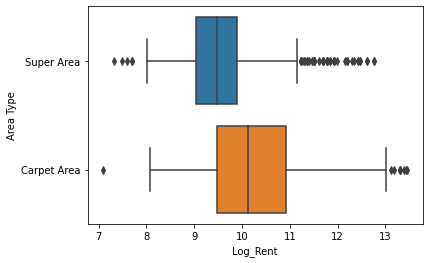

In [27]:
sns.boxplot(data=df,x='Log_Rent',y='Area Type')

In [ ]:
sns.boxplot(data=df,x='Log_Rent',y='Area Type')

<AxesSubplot:xlabel='Log_Rent', ylabel='City'>

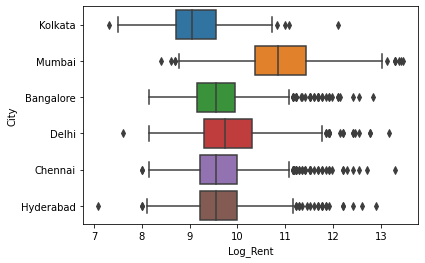

In [28]:
sns.boxplot(data=df,x='Log_Rent',y='City')

<AxesSubplot:xlabel='Log_Rent', ylabel='Point of Contact'>

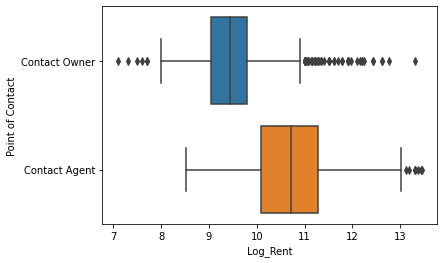

In [29]:
sns.boxplot(data=df,x='Log_Rent',y='Point of Contact')

<AxesSubplot:xlabel='Log_Rent', ylabel='Tenant Preferred'>

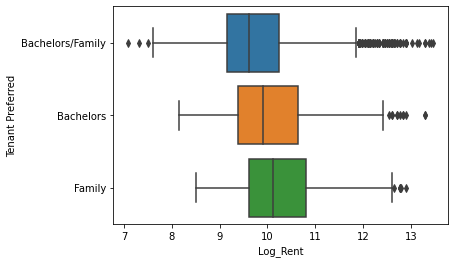

In [30]:
sns.boxplot(data=df,x='Log_Rent',y='Tenant Preferred')

<AxesSubplot:xlabel='Log_Rent', ylabel='Furnishing Status'>

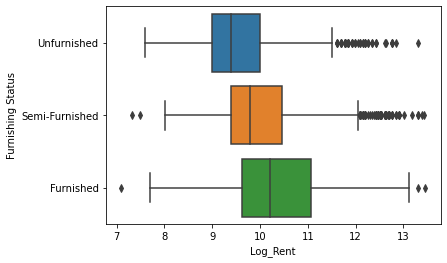

In [31]:
sns.boxplot(data=df,x='Log_Rent',y='Furnishing Status')

Finally let's look how the rent prices behave across time:

([<matplotlib.axis.XTick at 0x7fc6116b8910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

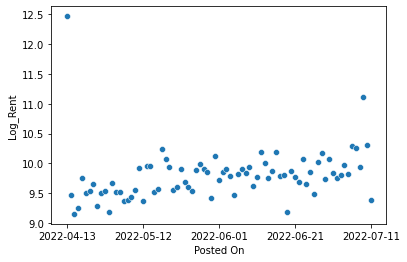

In [32]:
time_group = df.groupby(['Posted On']).mean()
sns.scatterplot(x=time_group.index,y=time_group['Log_Rent'])
locs, labels = plt.xticks()
new_locs=list(locs[::20]) #Slicing x ticks so they don't overlap
plt.xticks(new_locs) #Setting new ticks

Mean prices seem to be increasing as time goes on - prehaps its a temporary trend, considering we only have a few months of data it's hard to tell. The one outlier point in the top left corner is one of the extreme values we encountered before, and its the only posting for that day.


We don't have many numerical features, but there is one feature we can create, which is rent per square feet.

In [33]:
df['Cost_per_feet'] = df['Log_Rent']/np.log(df['Size']) #Take log of the size to properly scale boxplot

Let's see how this new feature is distributed:

<AxesSubplot:xlabel='Cost_per_feet', ylabel='City'>

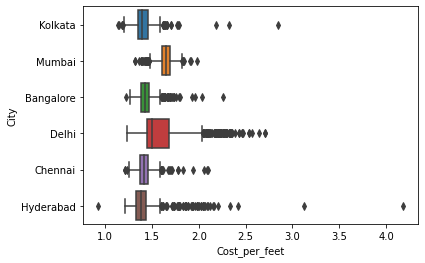

In [34]:
sns.boxplot(data=df,x='Cost_per_feet',y='City')

It seems like while Mumbai has higher rent prices, the prices per square feet are less varied . This is a bit unexpected, as Mumbai is denser and more populated than Delhi. Prehaps Delhi has a higher wealth inequality, leading to some dwellings being more "premium" than other? 

Another fun, but not necessarily useful plot is to look at cost per feet vs rent price:

<AxesSubplot:xlabel='Log_Rent', ylabel='Cost_per_feet'>

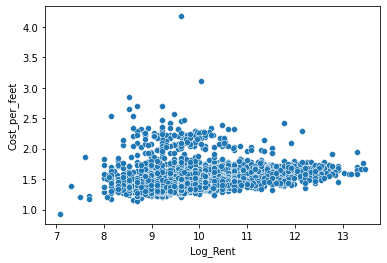

In [35]:
sns.scatterplot(data=df,x='Log_Rent',y='Cost_per_feet')

This seems to show that at lower rent prices one might be paying higher amount for square footage, i.e if your goal is to get as much space as possible, it makes more sense to rent a more expensive place.

We can also try engineering another fun feature: Rent per total amount of rooms.

In [52]:
df['Log_Rent_per_Room'] = df['Log_Rent']/(df['BHK'])
df['Room_Size'] = df['Size']/(df['BHK'])
df['Total_Room'] = df['Bathroom']+(df['BHK'])

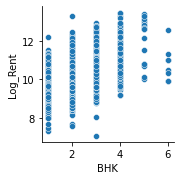

In [56]:
sns.pairplot(data=df,
            x_vars=df[['BHK']],y_vars=df[['Log_Rent']])

Let's see how the boxplot for this new feature vs city:

<AxesSubplot:xlabel='Log_Rent_per_Room', ylabel='City'>

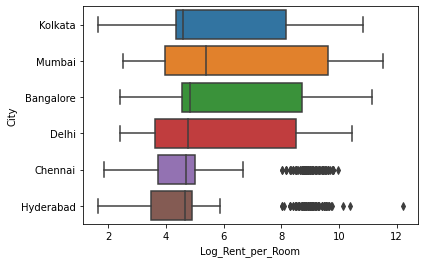

In [37]:
sns.boxplot(data=df,x='Log_Rent_per_Room',y='City')

It seems like if you want lot's of rooms for your money, Chennai and Hydrerabad might be the cities of choice.

<AxesSubplot:xlabel='Log_Rent_per_Room', ylabel='Tenant Preferred'>

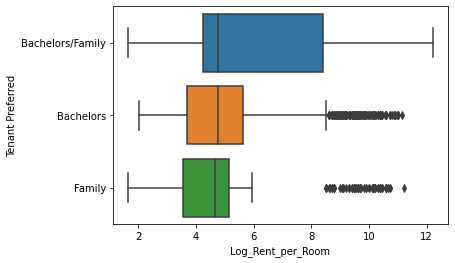

In [38]:
sns.boxplot(data=df,x='Log_Rent_per_Room',y='Tenant Preferred')

As expected, Family dwellings will have more rooms (For privacy reasons), and are therefore cheaper per room than other types. Maybe it's worth creating another feature that will compute size divided by number of rooms to see if rooms in family prefered housing are smaller

# Hypothesis Testing
We will examine 3 hypothesis, and perform statistical analysis to confirm or reject:
* Prices are increasing over time (I.e average of first derivative of price is above 0)
* Average price of dwelling is the same across "Contact Owner" and "Contact Agent" category
* If the variance in prices per square feet is similar between Mumbai and Delhi

**Hypothesis 1:**
We will test whether there is statistical evidence that the prices are not increasing over time.
* H_0: μ(d/dt(Price))=0 The average first momentum of the price is 0, and therefore prices do not change, on average, over time
* H_A: μ(d/dt(Price))>0 The average first momentum is greater than 0, and the prices increase over time

<AxesSubplot:xlabel='Posted On', ylabel='Log_Rent'>

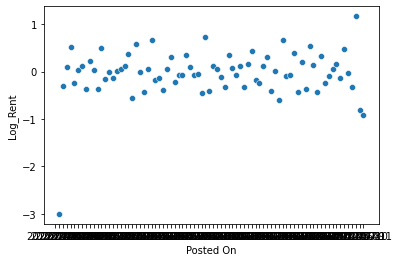

In [39]:
ch_price = df.groupby(['Posted On']).mean().diff().loc[:,['Log_Rent']] #Group by post date, take the means each day, take first differences
sns.scatterplot(x=time_group.index,y=ch_price['Log_Rent'])

The outlier on the first day might skew our results - we can safely remove it from our analysis, since it was a single abnormally high listing on that day.

<AxesSubplot:xlabel='Posted On', ylabel='Log_Rent'>

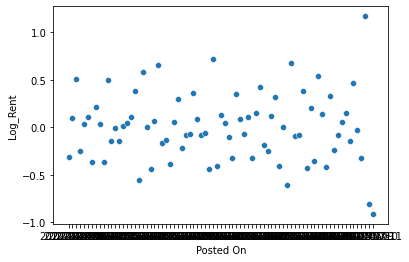

In [40]:
ch_price = ch_price[2:] #Element 0 is NA, due to differences we took, Element 1 is our outlier
sns.scatterplot(x=time_group.iloc[2:].index,y=ch_price['Log_Rent'])

Looks good, lets see some statistics about this:

In [41]:
ch_mean = ch_price.mean()
print("Average change of rent, in log units, each day is:",ch_mean,'total amount of days avaliable:',len(ch_price))

Average change of rent, in log units, each day is: Log_Rent   -0.00
dtype: float64 total amount of days avaliable: 79


As we can see above, the average rate of increase is near 0, even slightly negative, but is it statistically significant?

We will perform t-test to test our hypothesis, since we only have 79 data points:

In [42]:
t,p = stats.ttest_1samp(ch_price,0) #testing against 0 mean
alpha=0.05
p_onetail= p/2 #one-tail test
print("t_value = {} , p_value ={},p_value_onetail ={}".format(t, p,p_onetail))

t_value = [-0.02248457] , p_value =[0.98211884],p_value_onetail =[0.49105942]


In [43]:
if p_onetail <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_onetail,alpha) )
    print("Reject null hypothesis that the average increase in rent prices over time is 0.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_onetail,alpha))
    print("Failed to reject null hypothesis that the average increase in rent prices over time is 0.")

Conclusion:Since p value [0.49105942] is greater than alpha 0.05 
Failed to reject null hypothesis that the average increase in rent prices over time is 0.


We failed to reject the null hypothesis - meaning we're pretty sure the average increase in prices day to day is around 0.

Ideally, we should get more data, weight the results by number of postings that day (Otherwise we might have outliers like the one we removed above, where singular listing skews the results too much) and account for types/sizes of dwellings posted - there is always a chance of periods where less expensive listings dominate the market, decreasing the average price.